In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow_model_optimization as tfmot
import tensorflow as tf
import os
import tempfile
from keras.callbacks import ReduceLROnPlateau, TensorBoard, ModelCheckpoint

In [18]:
dataset = pd.read_excel('train_3rd_wrv.xlsx').values

In [19]:
train_percentage = 80
val_percentage = 20
def slice_dataset(dataset, percentage):
    data_size = len(dataset)
    index = [i for i in range (len(dataset))]
    np.random.shuffle(index)
    dataset_random = dataset[index,:]
    return dataset_random[:int(data_size*percentage/100)],dataset_random[int(data_size*percentage/100):]
train_dataset,val_dataset = slice_dataset(dataset, train_percentage)
X_train = np.expand_dims(train_dataset[:,0:5200].astype(float),axis =2)
Y_train = np.expand_dims(train_dataset[:,7000].astype(float),axis =1)
X_val = np.expand_dims(val_dataset[:,0:5200].astype(float),axis =2)
Y_val = np.expand_dims(val_dataset[:,7000].astype(float),axis =1)

In [29]:
f_input = 5200
f_output = 1
def setup_model():
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape =(f_input,1)),
        keras.layers.Conv1D(filters=48, kernel_size=1,strides=1, padding="valid",activation='relu'),
        keras.layers.Conv1D(filters=48, kernel_size=1,strides=1, padding="valid",activation='relu'),
        keras.layers.Flatten(),
        #eras.layers.Reshape(target_shape=(99,1,1)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.01),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(f_output, activation='linear'),
    ])
    return model

In [30]:
base_model = setup_model()
base_model.compile(optimizer = 'adam',
                 loss = 'mse',
                 metrics = ['mse'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor = 0.5, patience=20, mode='auto')
log_filepath = os.path.join('log')
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_filepath,histogram_freq=1)
history = base_model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=200,batch_size=16,callbacks=[reduce_lr])
scores = base_model.evaluate(X_val, Y_val, verbose=0)
#model.save(os.path.join(log_filepath,'DNN_model.h5'))
print('%s: %.2f%%' % (base_model.metrics_names[1], scores[1] * 100))

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
55/55 [==============================] - ETA: 0s - loss: 2.8149 - mse: 2.8149WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000025C485BD168> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and 

55/55 [==============================] - 2s 30ms/step - loss: 0.0476 - mse: 0.0476 - val_loss: 0.0730 - val_mse: 0.0730 - lr: 0.0010
Epoch 45/200
55/55 [==============================] - 2s 30ms/step - loss: 0.1086 - mse: 0.1086 - val_loss: 0.0713 - val_mse: 0.0713 - lr: 0.0010
Epoch 46/200
55/55 [==============================] - 2s 30ms/step - loss: 0.0602 - mse: 0.0602 - val_loss: 0.0582 - val_mse: 0.0582 - lr: 0.0010
Epoch 47/200
55/55 [==============================] - 2s 30ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0596 - val_mse: 0.0596 - lr: 0.0010
Epoch 48/200
55/55 [==============================] - 2s 31ms/step - loss: 0.0285 - mse: 0.0285 - val_loss: 0.0574 - val_mse: 0.0574 - lr: 0.0010
Epoch 49/200
55/55 [==============================] - 2s 30ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0471 - val_mse: 0.0471 - lr: 0.0010
Epoch 50/200
55/55 [==============================] - 2s 30ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0561 - val_mse: 0.0561 - lr

55/55 [==============================] - 3s 49ms/step - loss: 0.0317 - mse: 0.0317 - val_loss: 0.0680 - val_mse: 0.0680 - lr: 0.0010
Epoch 101/200
55/55 [==============================] - 3s 49ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0968 - val_mse: 0.0968 - lr: 0.0010
Epoch 102/200
55/55 [==============================] - 3s 50ms/step - loss: 0.0505 - mse: 0.0505 - val_loss: 0.1459 - val_mse: 0.1459 - lr: 0.0010
Epoch 103/200
55/55 [==============================] - 3s 47ms/step - loss: 0.1060 - mse: 0.1060 - val_loss: 0.1684 - val_mse: 0.1684 - lr: 0.0010
Epoch 104/200
55/55 [==============================] - 3s 52ms/step - loss: 0.0388 - mse: 0.0388 - val_loss: 0.0618 - val_mse: 0.0618 - lr: 0.0010
Epoch 105/200
55/55 [==============================] - 3s 48ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0441 - val_mse: 0.0441 - lr: 0.0010
Epoch 106/200
55/55 [==============================] - 3s 50ms/step - loss: 0.0281 - mse: 0.0281 - val_loss: 0.0467 - val_mse: 0.046

Epoch 155/200
55/55 [==============================] - 3s 50ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0401 - val_mse: 0.0401 - lr: 2.5000e-04
Epoch 156/200
55/55 [==============================] - 3s 47ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0486 - val_mse: 0.0486 - lr: 2.5000e-04
Epoch 157/200
55/55 [==============================] - 3s 51ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0486 - val_mse: 0.0486 - lr: 2.5000e-04
Epoch 158/200
55/55 [==============================] - 3s 48ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0373 - val_mse: 0.0373 - lr: 2.5000e-04
Epoch 159/200
55/55 [==============================] - 3s 52ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0375 - val_mse: 0.0375 - lr: 2.5000e-04
Epoch 160/200
55/55 [==============================] - 3s 48ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0383 - val_mse: 0.0383 - lr: 2.5000e-04
Epoch 161/200
55/55 [==============================] - 3s 50ms/step - loss: 0.0054 - mse: 0.00

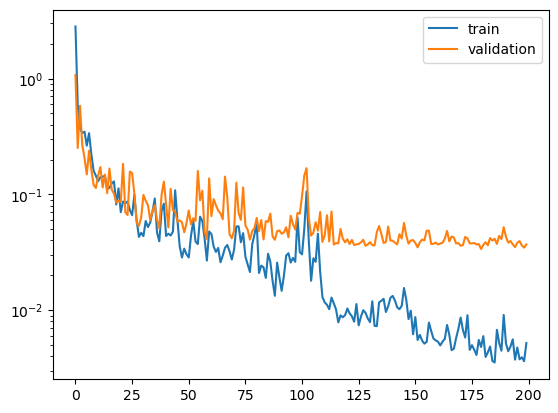

In [31]:
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

In [32]:
predicted =base_model.predict(X_val)
#inverse_data1 = min_max_scaler.inverse_transform(predicted)
#inverse_data2 = min_max_scaler.inverse_transform(Y_test)
print(predicted[1])
print(Y_val[1].reshape(1))
ERR = []
for i in range(0,len(Y_val)):
    error=(predicted[i]-Y_val[i].reshape(1))
    ERR.append(error)
ERR=np.abs(np.array(ERR))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7/7 [==============================] - 0s 23ms/step
[4.7582517]
[4.5]


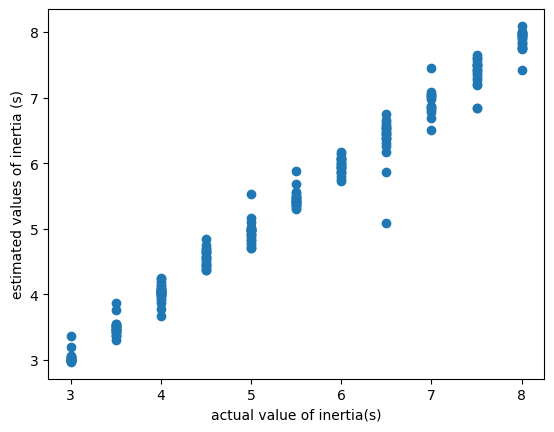

In [33]:
plt.xlabel('actual value of inertia(s)')
plt.ylabel('estimated values of inertia (s)')
plt.scatter(Y_val,predicted)
plt.savefig('Scatters_CNN_Delay_0.0.png',dpi=1000)
plt.show()

In [34]:
#print(ERR)
absvalues  = ERR.reshape(-1)
def acc(thre):
    Accuracy = np.sum(absvalues<=thre)/len(absvalues)
    return  Accuracy
print('\nTolerance=0.1: Accuracy=',  acc(0.1),
      '\nTolerance=0.2: Accuracy=',  acc(0.2),
      '\nTolerance=0.3: Accuracy=',  acc(0.3),
    '\nTolerance=0.4: Accuracy=', acc(0.4),'\nTolerance=0.5: Accuracy=',  acc(0.5))


Tolerance=0.1: Accuracy= 0.5863636363636363 
Tolerance=0.2: Accuracy= 0.8181818181818182 
Tolerance=0.3: Accuracy= 0.9272727272727272 
Tolerance=0.4: Accuracy= 0.9636363636363636 
Tolerance=0.5: Accuracy= 0.9727272727272728


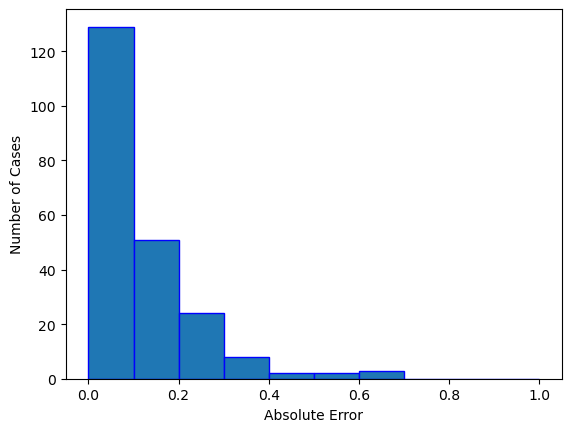

In [35]:
plt.hist(ERR.reshape(-1),bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],edgecolor='b')
plt.ylabel('Number of Cases')
plt.xlabel('Absolute Error')
plt.savefig('Dist_CNN.png',dpi=1000)

In [28]:
#print(ERR)
percent  = ERR.reshape(-1)/Y_val.reshape(-1)
def acc(thre):
    Accuracy = np.sum(percent<=thre)/len(percent)
    return  Accuracy
print('\nTolerance=0.01: Accuracy=',  acc(0.01),
      '\nTolerance=0.02: Accuracy=',  acc(0.02),
      '\nTolerance=0.03: Accuracy=',  acc(0.03),
    '\nTolerance=0.04: Accuracy=', acc(0.04),'\nTolerance=0.05: Accuracy=',  acc(0.05)
     ,'\nTolerance=0.06: Accuracy=', acc(0.06),'\nTolerance=0.07: Accuracy=',  acc(0.07)
     ,'\nTolerance=0.08: Accuracy=', acc(0.08)
     ,'\nTolerance=0.09: Accuracy=', acc(0.09),'\nTolerance=0.10: Accuracy=',  acc(0.1))


Tolerance=0.01: Accuracy= 0.2772727272727273 
Tolerance=0.02: Accuracy= 0.5 
Tolerance=0.03: Accuracy= 0.740909090909091 
Tolerance=0.04: Accuracy= 0.8772727272727273 
Tolerance=0.05: Accuracy= 0.9 
Tolerance=0.06: Accuracy= 0.9409090909090909 
Tolerance=0.07: Accuracy= 0.9681818181818181 
Tolerance=0.08: Accuracy= 0.9727272727272728 
Tolerance=0.09: Accuracy= 0.9772727272727273 
Tolerance=0.10: Accuracy= 0.9863636363636363
